# Восстановление золота из руды

Подготовbnm прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

# План проекта

**Загрузка и подготовка данных:**
* Импорт библиотек;
* Получение общей информации (head, info);
* Чтение датасетов, поиск пустых значений;

**Анализ данных:**
* Смотрим как изменяется концентрация металлов с каждой чисткой.
* Визуализация данных;
* Добавляем суммарную концентрацию в датасеты.


**Модель:**
* Приводим тренировочный датасет в подходящий для обучния вид;
= Создаём функцию sMAPE;
* Обучаем модели;
* Выбираем лучшую;
* Обучаем её на тестовой выборке и дамми.

**Вывод**


## Загрузка и подготовка данных

Нам нужно предсказать коэффициент золота ДО начала тех.процесса.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections

from sklearn.metrics import (mean_absolute_percentage_error,
                             mean_absolute_error as MAE,
                             make_scorer)

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from numpy.random import RandomState

In [2]:
gold_recovery_train = pd.read_csv('/content/gold_industry_train.csv')
gold_recovery_test_new = pd.read_csv('/content/gold_industry_test.csv')
gold_recovery_full_new = pd.read_csv('/content/gold_industry_full.csv')

In [3]:
display(gold_recovery_train.head(2))
display(gold_recovery_test_new.head(2))
display(gold_recovery_full_new.head(2))

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514


In [4]:
gold_recovery_train.info()
gold_recovery_test_new.info() #тут 53 колонки, нет целевых
gold_recovery_full_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [5]:
display(gold_recovery_train.duplicated().sum())
display(gold_recovery_test_new.duplicated().sum())
display(gold_recovery_full_new.duplicated().sum())

0

0

0

Ззаполняем пропуски в выборках. Все наблюдения представляют собой последовательные измерения, заполнить пропуски можно методами `pandas`: `ffill`/ `bfill`/ `interpolate`

In [6]:
for data in (gold_recovery_train, gold_recovery_test_new, gold_recovery_full_new):
    data.fillna(method='ffill', inplace=True)

Посмотрим на корректность рассчёта:

In [7]:
def recovery(sign):
    (input_au,
     output_au,
     output_tail) = (sign["rougher.input.feed_au"],
                     sign["rougher.output.concentrate_au"],
                     sign["rougher.output.tail_au"])
    recovery_metric = (((output_au) * ((input_au) - (output_tail)))/
                       (((input_au) * ((output_au) - (output_tail))))) * 100
    return recovery_metric

test = gold_recovery_train.dropna(subset = ["rougher.input.feed_au",
                                    "rougher.output.concentrate_au",
                                    "rougher.output.tail_au",
                                    "rougher.output.recovery"],axis = 0).apply(recovery,axis = 1)

print(MAE(gold_recovery_train.dropna(subset = ["rougher.input.feed_au",
                                    "rougher.output.concentrate_au",
                                    "rougher.output.tail_au",
                                    "rougher.output.recovery"])["rougher.output.recovery"], test), '- значение маленькое и близко к идеальному (к нулю), значит все посчитано верно')

9.83758577644259e-15 - значение маленькое и близко к идеальному (к нулю), значит все посчитано верно


В тестовой выборке отсутствуют в основном признаки продуктов:
- первое и второе очищение,
- финальное очищение,
- их результаты.




## Анализ данных

Смотрим что у нас есть по этапам очистки руды:

1. Найдем концентрацию на тренировочном датасете по разным этапам каждого элемента отдельно.
2. Найдем суммарную концентрацию веществ.

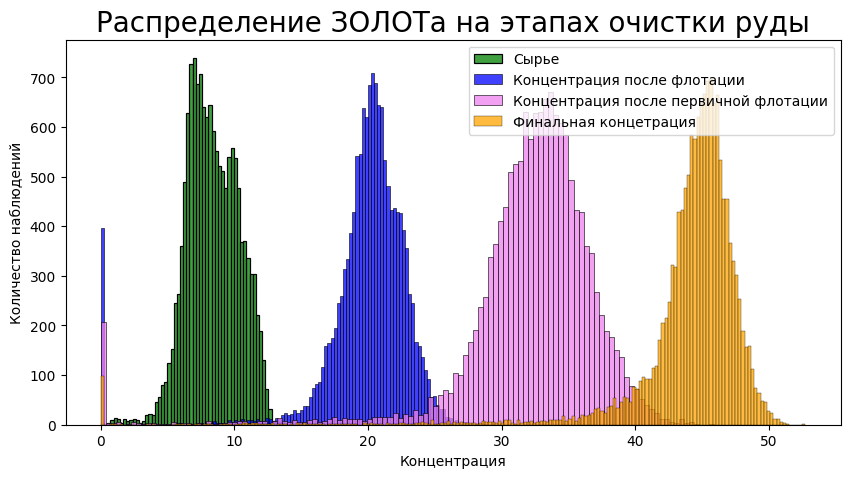

In [8]:
plt.figure(figsize=[10, 5])
plt.title('Распределение ЗОЛОТа на этапах очистки руды', fontsize=20)
sns.histplot(gold_recovery_train[f'rougher.input.feed_au'], color='green', label='Сырье')
sns.histplot(gold_recovery_train[f'rougher.output.concentrate_au'], color='blue', label='Концентрация после флотации')
sns.histplot(gold_recovery_train[f'primary_cleaner.output.concentrate_au'], color='violet', label='Концентрация после первичной флотации')
sns.histplot(gold_recovery_train[f'final.output.concentrate_au'], color='orange', label='Финальная концетрация')
plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

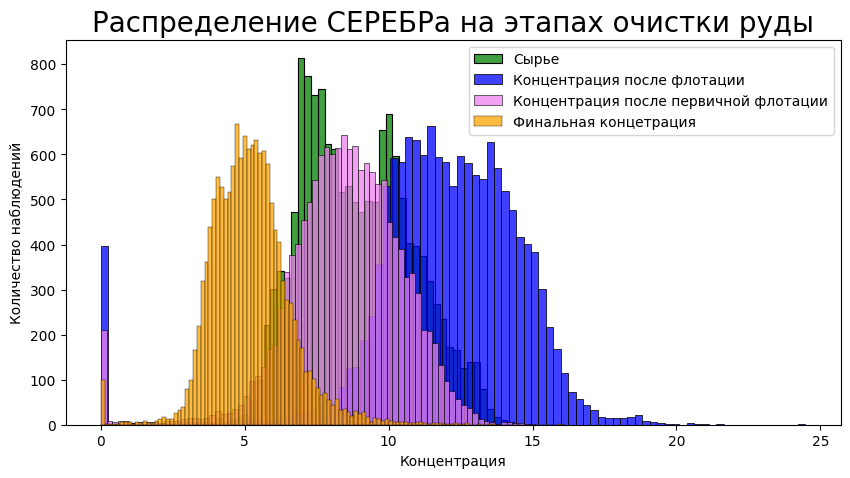

In [9]:
plt.figure(figsize=[10, 5])
plt.title('Распределение СЕРЕБРа на этапах очистки руды', fontsize=20)
sns.histplot(gold_recovery_train[f'rougher.input.feed_ag'], color='green', label='Сырье')
sns.histplot(gold_recovery_train[f'rougher.output.concentrate_ag'], color='blue', label='Концентрация после флотации')
sns.histplot(gold_recovery_train[f'primary_cleaner.output.concentrate_ag'], color='violet', label='Концентрация после первичной флотации')
sns.histplot(gold_recovery_train[f'final.output.concentrate_ag'], color='orange', label='Финальная концетрация')
plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

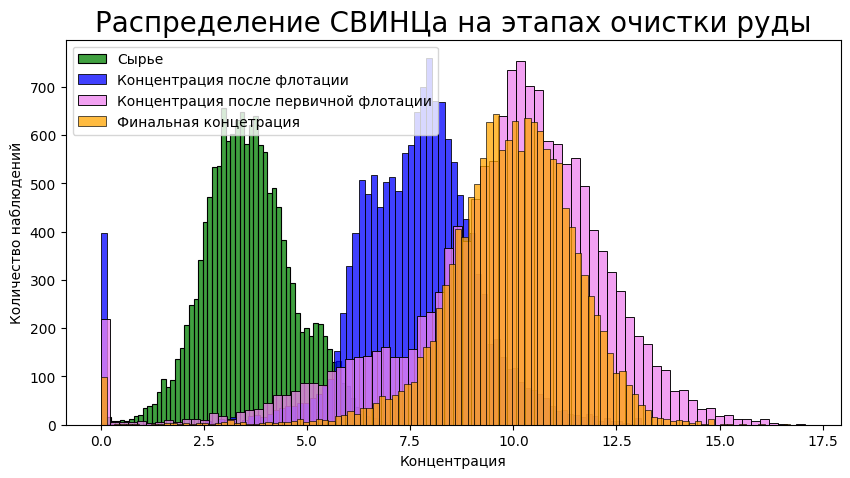

In [10]:
plt.figure(figsize=[10, 5])
plt.title('Распределение СВИНЦа на этапах очистки руды', fontsize=20)
sns.histplot(gold_recovery_train[f'rougher.input.feed_pb'], color='green', label='Сырье')
sns.histplot(gold_recovery_train[f'rougher.output.concentrate_pb'], color='blue', label='Концентрация после флотации')
sns.histplot(gold_recovery_train[f'primary_cleaner.output.concentrate_pb'], color='violet', label='Концентрация после первичной флотации')
sns.histplot(gold_recovery_train[f'final.output.concentrate_pb'], color='orange', label='Финальная концетрация')
plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

С каждой чисткой:
- концентрация золота увеличивается,
- концентрация серебра уменьшилась в финале,
- свинец увеличился в сравнении до очистки, но в финальной стадии мало отличился концентрацией после первой очистки.

Найдём суммарное значение концентраций в тренировочном датасете и посторим график:

In [11]:
#сумма концентрации сырья
gold_recovery_train['sum_rougher_input_feed'] = gold_recovery_train[['rougher.input.feed_pb',
                                              'rougher.input.feed_ag',
                                              'rougher.input.feed_sol',
                                              'rougher.input.feed_au']].sum(axis=1)

#сумма концентрации после первичной флотации
gold_recovery_train['sum_primary_output_concentrate'] = gold_recovery_train[['primary_cleaner.output.concentrate_pb',
                                                      'primary_cleaner.output.concentrate_ag',
                                                      'primary_cleaner.output.concentrate_sol',
                                                      'primary_cleaner.output.concentrate_au']].sum(axis=1)

#сумма концентрации после флотации
gold_recovery_train['sum_rougher_output_concentrate'] = gold_recovery_train[['rougher.output.concentrate_pb',
                                                      'rougher.output.concentrate_ag',
                                                      'rougher.output.concentrate_sol',
                                                      'rougher.output.concentrate_au']].sum(axis=1)

#сумма концентрации финальная
gold_recovery_train['sum_final_output'] = gold_recovery_train[['final.output.concentrate_pb',
                                        'final.output.concentrate_ag',
                                        'final.output.concentrate_sol',
                                        'final.output.concentrate_au']].sum(axis=1)

display(gold_recovery_train.head(10))

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,sum_rougher_input_feed,sum_primary_output_concentrate,sum_rougher_output_concentrate,sum_final_output
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297,51.680034,72.640924,66.424950,63.644396
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514,50.659114,72.543485,67.012710,63.957723
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849,50.609929,72.095042,66.103793,64.311180
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835,51.061546,59.957723,65.752751,63.573449
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686,47.859163,71.321010,65.908382,64.004667
5,2016-01-15 05:00:00,5.687168,5.801920,1.879351,35.470082,546.173470,57.469578,11.072517,6.200383,999.934134,...,5.480257,69.465816,1.918586,10.182708,0.664118,16.999638,48.838521,70.607932,64.955919,63.646320
6,2016-01-15 06:00:00,6.038436,6.056253,2.105501,34.920570,523.376439,56.674647,11.535899,6.204974,999.832373,...,4.569100,69.300835,2.058913,10.304598,0.807342,16.723575,49.120760,71.165854,65.372419,63.156407
7,2016-01-15 07:00:00,6.433854,5.955053,2.310432,36.091386,549.842749,56.730325,12.557906,6.799275,1000.166602,...,4.389813,70.230976,2.143437,10.443288,0.949346,16.689959,50.790724,71.533310,65.180132,62.908843
8,2016-01-15 08:00:00,6.526612,5.878084,2.391713,35.753879,560.115242,56.649893,13.166128,6.798659,1000.026864,...,4.876389,69.688595,2.209881,10.420140,1.065453,17.201948,50.550288,72.072013,65.625127,64.185763
9,2016-01-15 09:00:00,6.747693,5.974832,2.539114,38.553938,566.616045,60.308763,13.996130,6.800263,1000.332327,...,5.214161,70.973641,2.200997,10.473539,1.171183,17.717049,53.815577,72.254860,65.992853,64.650224


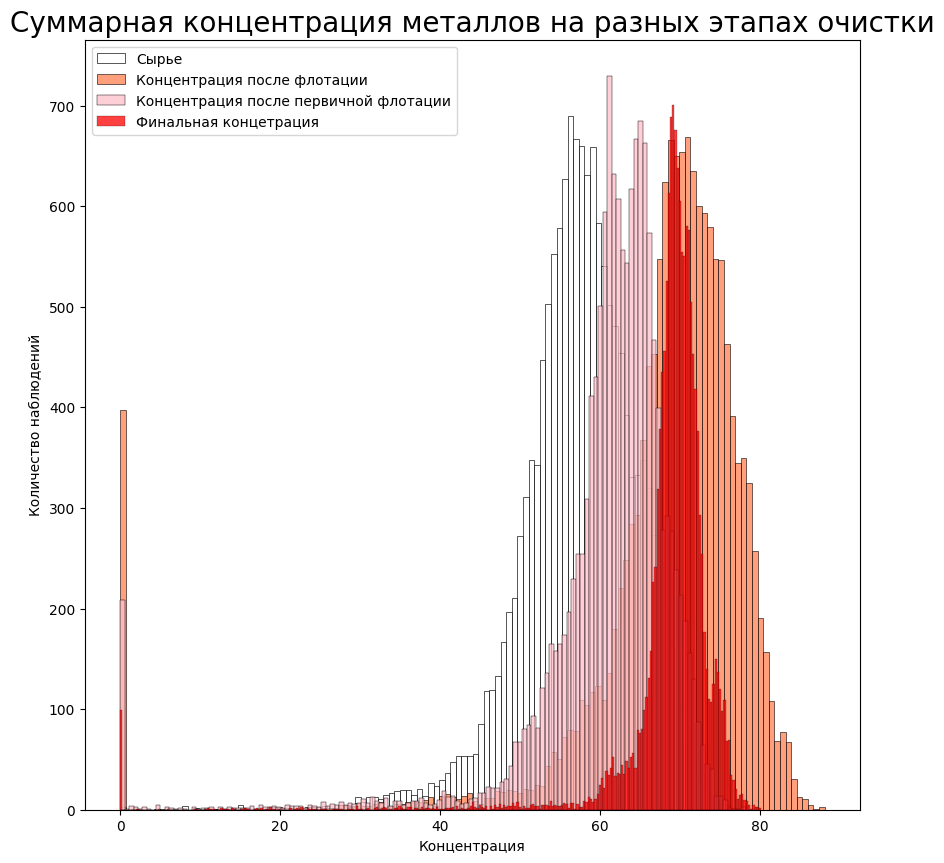

In [12]:
plt.figure(figsize=[10, 10])
plt.title('Суммарная концентрация металлов на разных этапах очистки', fontsize=20)
sns.histplot(gold_recovery_train[f'sum_rougher_input_feed'], color='white', label='Сырье')
sns.histplot(gold_recovery_train[f'sum_rougher_output_concentrate'], color='coral', label='Концентрация после флотации')
sns.histplot(gold_recovery_train[f'sum_primary_output_concentrate'], color='pink', label='Концентрация после первичной флотации')
sns.histplot(gold_recovery_train[f'sum_final_output'], color='red', label='Финальная концетрация')
plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

*Построила график для себя. Интересно было понять сколько вбросов перед обработкой и до. Вышло совсем мало.

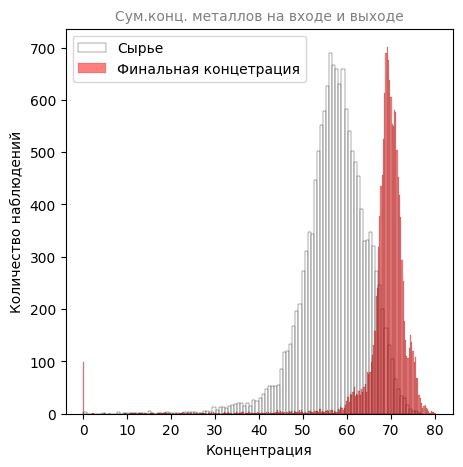

In [13]:
plt.figure(figsize=[5, 5])
plt.title('Сум.конц. металлов на входе и выходе', fontsize=10, alpha=0.5)
sns.histplot(gold_recovery_train[f'sum_rougher_input_feed'], color='white', label='Сырье', alpha=0.5)
sns.histplot(gold_recovery_train[f'sum_final_output'], color='red', label='Финальная концетрация', alpha=0.5)
plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

In [14]:
for col in ['sum_rougher_input_feed', 'sum_rougher_output_concentrate', 'sum_primary_output_concentrate', 'sum_final_output']:
     gold_recovery_train = gold_recovery_train[gold_recovery_train[col]>0]

display(gold_recovery_train.head(10))

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,sum_rougher_input_feed,sum_primary_output_concentrate,sum_rougher_output_concentrate,sum_final_output
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297,51.680034,72.640924,66.424950,63.644396
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514,50.659114,72.543485,67.012710,63.957723
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849,50.609929,72.095042,66.103793,64.311180
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835,51.061546,59.957723,65.752751,63.573449
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686,47.859163,71.321010,65.908382,64.004667
5,2016-01-15 05:00:00,5.687168,5.801920,1.879351,35.470082,546.173470,57.469578,11.072517,6.200383,999.934134,...,5.480257,69.465816,1.918586,10.182708,0.664118,16.999638,48.838521,70.607932,64.955919,63.646320
6,2016-01-15 06:00:00,6.038436,6.056253,2.105501,34.920570,523.376439,56.674647,11.535899,6.204974,999.832373,...,4.569100,69.300835,2.058913,10.304598,0.807342,16.723575,49.120760,71.165854,65.372419,63.156407
7,2016-01-15 07:00:00,6.433854,5.955053,2.310432,36.091386,549.842749,56.730325,12.557906,6.799275,1000.166602,...,4.389813,70.230976,2.143437,10.443288,0.949346,16.689959,50.790724,71.533310,65.180132,62.908843
8,2016-01-15 08:00:00,6.526612,5.878084,2.391713,35.753879,560.115242,56.649893,13.166128,6.798659,1000.026864,...,4.876389,69.688595,2.209881,10.420140,1.065453,17.201948,50.550288,72.072013,65.625127,64.185763
9,2016-01-15 09:00:00,6.747693,5.974832,2.539114,38.553938,566.616045,60.308763,13.996130,6.800263,1000.332327,...,5.214161,70.973641,2.200997,10.473539,1.171183,17.717049,53.815577,72.254860,65.992853,64.650224


Посчитаем суммарную концентрацию для полного датасета.
И почистим его.

In [15]:
#сумма концентрации сырья
gold_recovery_full_new['sum_rougher_input_feed'] = gold_recovery_full_new[['rougher.input.feed_pb',
                                              'rougher.input.feed_ag',
                                              'rougher.input.feed_sol',
                                              'rougher.input.feed_au']].sum(axis=1)

#сумма концентрации после первичной флотации
gold_recovery_full_new['sum_primary_output_concentrate'] = gold_recovery_full_new[['primary_cleaner.output.concentrate_pb',
                                                      'primary_cleaner.output.concentrate_ag',
                                                      'primary_cleaner.output.concentrate_sol',
                                                      'primary_cleaner.output.concentrate_au']].sum(axis=1)

#сумма концентрации после флотации
gold_recovery_full_new['sum_rougher_output_concentrate'] = gold_recovery_full_new[['rougher.output.concentrate_pb',
                                                      'rougher.output.concentrate_ag',
                                                      'rougher.output.concentrate_sol',
                                                      'rougher.output.concentrate_au']].sum(axis=1)

#сумма концентрации финальная
gold_recovery_full_new['sum_final_output'] = gold_recovery_full_new[['final.output.concentrate_pb',
                                        'final.output.concentrate_ag',
                                        'final.output.concentrate_sol',
                                        'final.output.concentrate_au']].sum(axis=1)

display(gold_recovery_full_new.head(10))

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,sum_rougher_input_feed,sum_primary_output_concentrate,sum_rougher_output_concentrate,sum_final_output
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297,51.680034,72.640924,66.424950,63.644396
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514,50.659114,72.543485,67.012710,63.957723
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849,50.609929,72.095042,66.103793,64.311180
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835,51.061546,59.957723,65.752751,63.573449
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686,47.859163,71.321010,65.908382,64.004667
5,2016-01-15 05:00:00,5.687168,5.801920,1.879351,35.470082,546.173470,57.469578,11.072517,6.200383,999.934134,...,5.480257,69.465816,1.918586,10.182708,0.664118,16.999638,48.838521,70.607932,64.955919,63.646320
6,2016-01-15 06:00:00,6.038436,6.056253,2.105501,34.920570,523.376439,56.674647,11.535899,6.204974,999.832373,...,4.569100,69.300835,2.058913,10.304598,0.807342,16.723575,49.120760,71.165854,65.372419,63.156407
7,2016-01-15 07:00:00,6.433854,5.955053,2.310432,36.091386,549.842749,56.730325,12.557906,6.799275,1000.166602,...,4.389813,70.230976,2.143437,10.443288,0.949346,16.689959,50.790724,71.533310,65.180132,62.908843
8,2016-01-15 08:00:00,6.526612,5.878084,2.391713,35.753879,560.115242,56.649893,13.166128,6.798659,1000.026864,...,4.876389,69.688595,2.209881,10.420140,1.065453,17.201948,50.550288,72.072013,65.625127,64.185763
9,2016-01-15 09:00:00,6.747693,5.974832,2.539114,38.553938,566.616045,60.308763,13.996130,6.800263,1000.332327,...,5.214161,70.973641,2.200997,10.473539,1.171183,17.717049,53.815577,72.254860,65.992853,64.650224


In [16]:
for col in ['sum_rougher_input_feed', 'sum_rougher_output_concentrate', 'sum_primary_output_concentrate', 'sum_final_output']:
     gold_recovery_full_new = gold_recovery_full_new[gold_recovery_full_new[col]>0]

display(gold_recovery_full_new.head(10))

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,sum_rougher_input_feed,sum_primary_output_concentrate,sum_rougher_output_concentrate,sum_final_output
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297,51.680034,72.640924,66.424950,63.644396
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514,50.659114,72.543485,67.012710,63.957723
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849,50.609929,72.095042,66.103793,64.311180
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835,51.061546,59.957723,65.752751,63.573449
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686,47.859163,71.321010,65.908382,64.004667
5,2016-01-15 05:00:00,5.687168,5.801920,1.879351,35.470082,546.173470,57.469578,11.072517,6.200383,999.934134,...,5.480257,69.465816,1.918586,10.182708,0.664118,16.999638,48.838521,70.607932,64.955919,63.646320
6,2016-01-15 06:00:00,6.038436,6.056253,2.105501,34.920570,523.376439,56.674647,11.535899,6.204974,999.832373,...,4.569100,69.300835,2.058913,10.304598,0.807342,16.723575,49.120760,71.165854,65.372419,63.156407
7,2016-01-15 07:00:00,6.433854,5.955053,2.310432,36.091386,549.842749,56.730325,12.557906,6.799275,1000.166602,...,4.389813,70.230976,2.143437,10.443288,0.949346,16.689959,50.790724,71.533310,65.180132,62.908843
8,2016-01-15 08:00:00,6.526612,5.878084,2.391713,35.753879,560.115242,56.649893,13.166128,6.798659,1000.026864,...,4.876389,69.688595,2.209881,10.420140,1.065453,17.201948,50.550288,72.072013,65.625127,64.185763
9,2016-01-15 09:00:00,6.747693,5.974832,2.539114,38.553938,566.616045,60.308763,13.996130,6.800263,1000.332327,...,5.214161,70.973641,2.200997,10.473539,1.171183,17.717049,53.815577,72.254860,65.992853,64.650224


Добавляем в тестовый датасет данные из полного датасета:

In [17]:
gold_recovery_test_new = gold_recovery_test_new.merge(gold_recovery_full_new[['rougher.output.recovery', 'final.output.recovery', 'date']], how = 'inner', on= 'date')
display(gold_recovery_test_new.head(2))

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575,89.514960,70.281454
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,89.858126,65.523246


Для всех датасетов делаем индексом дату из полного датасета:

In [18]:
gold_recovery_train = gold_recovery_train.set_index('date')
gold_recovery_full_new = gold_recovery_full_new.set_index('date')
gold_recovery_train = gold_recovery_train.loc[gold_recovery_train.index.isin(gold_recovery_full_new.index)]

Сравниваем распределения размеров гранул сырья на обучающей и тестовой выборках.

Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

Используем график плотности.

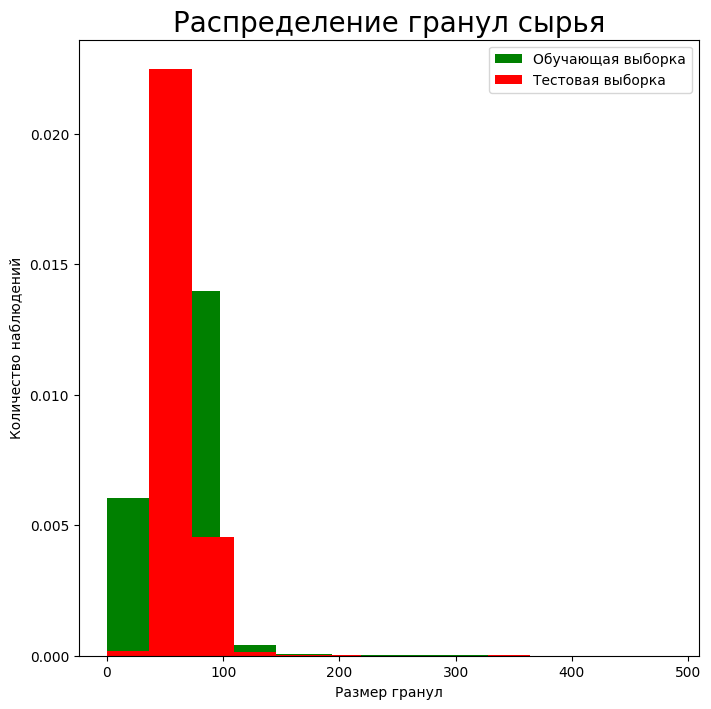

In [19]:
plt.figure(figsize=[8, 8])
plt.title('Распределение гранул сырья', fontsize=20)
plt.hist(gold_recovery_train[f'rougher.input.feed_size'], color='green', label='Обучающая выборка', density=True)
plt.hist(gold_recovery_test_new[f'rougher.input.feed_size'], color='red', label='Тестовая выборка', density=True)
plt.xlabel('Размер гранул')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

Распределения примерно одинаковы.

## Модель

### Подготавливаем данные для модели.

Удаляем характеристики, котоыре  получают после завершения тех.процессов из трен.выборки. А нам нужны данные ДО.

Смотрим какие колонки из теста нужно оставить в трейне. Дата идет первая - ее не рассматриваем.

In [20]:
features_train_col = list(gold_recovery_test_new.columns)[1:]
print(features_train_col)

['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_ai

Чистим тренировочный датасет: оставляем только стобцы из теста + целевые.

In [21]:

gold_recovery_train_clear = gold_recovery_train[['primary_cleaner.input.sulfate',
                                                 'primary_cleaner.input.depressant',
                                                 'primary_cleaner.input.feed_size',
                                                 'primary_cleaner.input.xanthate',
                                                 'primary_cleaner.state.floatbank8_a_air',
                                                 'primary_cleaner.state.floatbank8_a_level',
                                                 'primary_cleaner.state.floatbank8_b_air',
                                                 'primary_cleaner.state.floatbank8_b_level',
                                                 'primary_cleaner.state.floatbank8_c_air',
                                                 'primary_cleaner.state.floatbank8_c_level',
                                                 'primary_cleaner.state.floatbank8_d_air',
                                                 'primary_cleaner.state.floatbank8_d_level',
                                                 'rougher.input.feed_ag',
                                                 'rougher.input.feed_pb',
                                                 'rougher.input.feed_rate',
                                                 'rougher.input.feed_size',
                                                 'rougher.input.feed_sol',
                                                 'rougher.input.feed_au',
                                                 'rougher.input.floatbank10_sulfate',
                                                 'rougher.input.floatbank10_xanthate',
                                                 'rougher.input.floatbank11_sulfate',
                                                 'rougher.input.floatbank11_xanthate',
                                                 'rougher.state.floatbank10_a_air',
                                                 'rougher.state.floatbank10_a_level',
                                                 'rougher.state.floatbank10_b_air',
                                                 'rougher.state.floatbank10_b_level',
                                                 'rougher.state.floatbank10_c_air',
                                                 'rougher.state.floatbank10_c_level',
                                                 'rougher.state.floatbank10_d_air',
                                                 'rougher.state.floatbank10_d_level',
                                                 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level',
                                                 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level',
                                                 'secondary_cleaner.state.floatbank2_a_air',
                                                 'secondary_cleaner.state.floatbank2_a_level',
                                                 'secondary_cleaner.state.floatbank2_b_air',
                                                 'secondary_cleaner.state.floatbank2_b_level',
                                                 'secondary_cleaner.state.floatbank3_a_air',
                                                 'secondary_cleaner.state.floatbank3_a_level',
                                                 'secondary_cleaner.state.floatbank3_b_air',
                                                 'secondary_cleaner.state.floatbank3_b_level',
                                                 'secondary_cleaner.state.floatbank4_a_air',
                                                 'secondary_cleaner.state.floatbank4_a_level',
                                                 'secondary_cleaner.state.floatbank4_b_air',
                                                 'secondary_cleaner.state.floatbank4_b_level',
                                                 'secondary_cleaner.state.floatbank5_a_air',
                                                 'secondary_cleaner.state.floatbank5_a_level',
                                                 'secondary_cleaner.state.floatbank5_b_air',
                                                 'secondary_cleaner.state.floatbank5_b_level',
                                                 'secondary_cleaner.state.floatbank6_a_air',
                                                 'secondary_cleaner.state.floatbank6_a_level',
                                                 'rougher.output.recovery',
                                                 'final.output.recovery']]

display(gold_recovery_train_clear.head(10))

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445
2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430,68.347543
2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794,66.927016
2016-01-15 05:00:00,115.581252,12.470773,7.25,0.965760,1602.964922,-498.090944,1602.074298,-500.179481,1602.154812,-498.642614,...,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915,88.156912,69.465816
2016-01-15 06:00:00,117.322323,12.469088,7.25,0.895207,1597.532455,-500.985364,1602.816321,-500.696736,1603.572091,-500.256955,...,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470,88.168065,69.300835
2016-01-15 07:00:00,124.592960,12.467403,7.25,0.901202,1597.946266,-501.592304,1601.078254,-499.494115,1602.630688,-500.173741,...,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070,87.668336,70.230976
2016-01-15 08:00:00,131.781026,12.465718,7.25,0.885535,1601.670053,-499.548891,1598.804355,-499.689644,1601.689285,-500.484957,...,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188,87.035862,69.688595


In [22]:
print(gold_recovery_test_new.shape)
print(gold_recovery_train_clear.shape)

(4860, 55)
(13988, 54)


Создаем фукнцию для SMAPE:

In [23]:
def smape(target, predict):
    smape = (1/len(target))*np.sum((np.abs(target - predict))/( (np.abs(target)+np.abs(predict))/2))*100
    return smape

smape_scorer = make_scorer(smape, greater_is_better = False)


def final_smape(rougher, final):
    final = 0.25*rougher+0.75*final
    return final



Разделим обучающую и тестовую выборки на признаки и целевые признаки:

In [24]:
features_train = gold_recovery_train_clear.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_rougher_train = gold_recovery_train_clear['rougher.output.recovery']
target_final_train = gold_recovery_train_clear['final.output.recovery']
print(features_train.shape)


(13988, 52)


### Обучаем модели

DecisionTreeRegressor:

In [25]:
state = RandomState(12345)


min_result_DT = 100
best_param_DT = 0

for depth in range(1, 11):
    model_rougher_DT = DecisionTreeRegressor(max_depth=depth, random_state=state)
    smape_rougher_DT = cross_val_score(model_rougher_DT, features_train, target_rougher_train, scoring=smape_scorer, cv=5)
    final_smape_rougher_DT = smape_rougher_DT.mean()

    model_final_DT = DecisionTreeRegressor(max_depth=depth, random_state=state)
    smape_final_DT = cross_val_score(model_final_DT, features_train, target_final_train, scoring=smape_scorer, cv=5)
    final_smape_final_DT = smape_final_DT.mean()
    result_smape_DT = final_smape(final_smape_rougher_DT, final_smape_final_DT)
    if result_smape_DT < min_result_DT:
        min_result_DT = result_smape_DT
        best_param_DT = depth

    print('Итоговое SMAPE для реш.дерева :', min_result_DT*-1)
    print('Лучшие параметры :', best_param_DT)

print('Конец')

Итоговое SMAPE для реш.дерева : 8.872672223763681
Лучшие параметры : 1
Итоговое SMAPE для реш.дерева : 8.872672223763681
Лучшие параметры : 1
Итоговое SMAPE для реш.дерева : 8.872672223763681
Лучшие параметры : 1
Итоговое SMAPE для реш.дерева : 9.174150808819192
Лучшие параметры : 4
Итоговое SMAPE для реш.дерева : 9.521194570952987
Лучшие параметры : 5
Итоговое SMAPE для реш.дерева : 9.86031875760765
Лучшие параметры : 6
Итоговое SMAPE для реш.дерева : 10.582544173908191
Лучшие параметры : 7
Итоговое SMAPE для реш.дерева : 11.166454179622344
Лучшие параметры : 8
Итоговое SMAPE для реш.дерева : 11.686823851438922
Лучшие параметры : 9
Итоговое SMAPE для реш.дерева : 12.076503314579467
Лучшие параметры : 10
Конец


RandomForestRegressor:

In [26]:
best_result_RF = 100
best_param_RF = 0

for est in range(1, 100, 25):
    for depth in range(1,11):
        model_rougher_RF = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=state)
        smape_rougher_RF = cross_val_score(model_rougher_RF, features_train, target_rougher_train, scoring=smape_scorer, cv=5)
        final_smape_rougher_RF = smape_rougher_RF.mean()

        model_final_RF = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=state)
        smape_final_RF = cross_val_score(model_final_RF, features_train, target_final_train, scoring=smape_scorer, cv=5)
        final_smape_final_RF = smape_final_RF.mean()
        result_smape_RF = final_smape(final_smape_rougher_RF, final_smape_final_RF)
        if result_smape_RF < best_result_RF:
            best_result_RF = result_smape_RF
            best_param_RF = [est, depth]


    print('Лучший параметры модели:', best_param_RF)
    print('Итоговое SMAPE для случ.леса :', best_result_RF*-1)

print('Конец')

Лучший параметры модели: [1, 10]
Итоговое SMAPE для случ.леса : 13.3874066464641
Лучший параметры модели: [1, 10]
Итоговое SMAPE для случ.леса : 13.3874066464641
Лучший параметры модели: [1, 10]
Итоговое SMAPE для случ.леса : 13.3874066464641
Лучший параметры модели: [1, 10]
Итоговое SMAPE для случ.леса : 13.3874066464641
Конец


LinearRegression:

In [27]:
model_rougher_LR = LinearRegression()
smape_rougher = cross_val_score(model_rougher_LR, features_train, target_rougher_train, scoring=smape_scorer, cv=5)
final_smape_rougher = smape_rougher.mean()

model_final_LR = LinearRegression()
smape_final = cross_val_score(model_final_LR, features_train, target_final_train, scoring=smape_scorer, cv=5)
final_smape_final = smape_final.mean()

result_smape_LR = final_smape(final_smape_rougher, final_smape_final)

print('Итоговое SMAPE для лог.регрессии :', result_smape_LR*-1)

Итоговое SMAPE для лог.регрессии : 8.868239156985926


Разделим обучающую выборку на признаки и целевые признаки:

In [28]:
features_test = gold_recovery_test_new.drop(['rougher.output.recovery','final.output.recovery', 'date'], axis=1)
target_rougher_test = gold_recovery_test_new['rougher.output.recovery']
target_final_test = gold_recovery_test_new['final.output.recovery']
print(features_test.shape)

(4860, 52)


Выбираем  лучшую модель и обучаем ее на тренировочной выборке + проверяем на тестовой предсказания + считаем sMAPE:

In [30]:
model_test_rougher = DecisionTreeRegressor(max_depth=1, random_state=state)
model_test_rougher.fit(features_train, target_rougher_train)
predicted_rougher = model_test_rougher.predict(features_test)

model_test_final = DecisionTreeRegressor(max_depth=1, random_state=state)
model_test_final.fit(features_train, target_final_train)
predicted_final = model_test_final.predict(features_test)

smape_test_rougher = smape(target_rougher_test, predicted_rougher)
smape_test_final = smape(target_final_test, predicted_final)
final_smape_test = final_smape(smape_test_rougher, smape_test_final)

print(final_smape_test)

ValueError: ignored

Проверим на дамми:

In [31]:
dummy_rougher = DummyRegressor(strategy="mean")
dummy_rougher.fit(features_train, target_rougher_train)
dummy_predicted_rougher = dummy_rougher.predict(features_test)
smape_const_rougher = smape(target_rougher_test, dummy_predicted_rougher)

dummy_final = DummyRegressor(strategy="mean")
dummy_final.fit(features_train, target_final_train)
dummy_predicted_final = dummy_final.predict(features_test)
smape_const_final = smape(target_final_test, dummy_predicted_final)

final_smape_const = final_smape(smape_const_rougher, smape_const_final)
print(final_smape_const)

8.472648251321258


## Вывод:
1. При обработке концентарция:
- золота увеличивается значительно,
- свинца увеличивается,
- серебро снижается.
2. Лушчшая модель - Решающее дерево.
3. Лучшая модель прошла проверку адекватности и обучение на тесте: симм.отклонение составило 7.312 и 7.778 соответственно. Эти данные были получены после очистки выбросов и учета на трейн-выборке столбцов как на тестовой.

**Примечания и особенности данных:**
0. Прежде чем проводить аналитику нужно подробно изучить предоставленные данные. Разобраться в них. Иначе результаты могут быть искажены. Без чистки данных у меня выходило симм.отклонение на 25% больше, чем есть на самом деле.
1. В тестовой выборке отсутствовали цел.признаки - добавляла из полной выборки.

2. Оставила в трейн-выборке только те признаки, которые есть в тесте + цел.признаки.
3. Дату сделал индексом выборок, а при обучении и проверке удалила ее.
4. Заполнены пропуски данных.
